<a href="https://colab.research.google.com/github/Zainab26mahj/Medical-Insurance-Costs-Prediction/blob/main/Medical_Insurance_Costs_Prediction_with_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

In [3]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print(data.info)

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [5]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


After a broad look at the data, the data may be classified as simple. There is a total of 1338 rows and 7 columns. The types of columns are corresponding well to the nature of the dataset.


In [7]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

<ipython-input-7-55cc6b878dd8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
<ipython-input-7-55cc6b878dd8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})


In [8]:
label_encoder = preprocessing.LabelEncoder()
data['region']= label_encoder.fit_transform(data['region'])

In [9]:
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       1  21984.47061
4   32    0  28.880         0       0       1   3866.85520


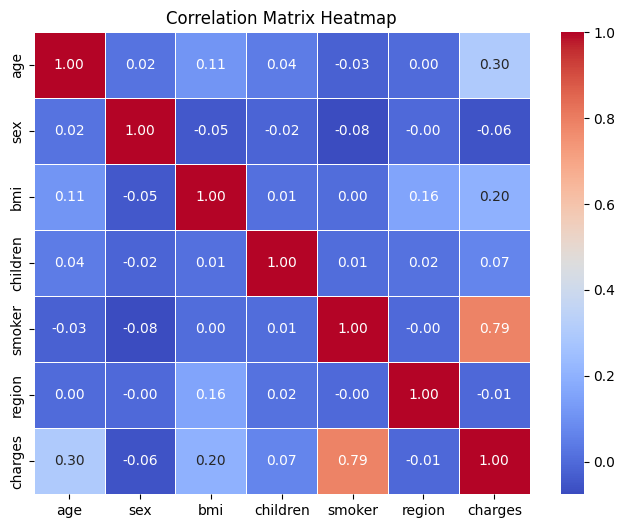

In [10]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()

Following a correlation study to understand which columns affect each other, the most significant relationship is between smoker and charges. It is translated as a strong positive relationship. To sum up, if a person is a smoker then it is more likely for that person to have higher charges.

In [11]:
y = data['charges']
X = data.loc[:, data.columns != 'charges']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.57056264e+02  1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Intercept: -11965.398023961936


In [19]:
coefficients = model.coef_
columns = X_train.columns

for col, coef in zip(columns, coefficients):
    print(f"{col}: {coef}")

age: 257.0562636444156
sex: 18.791456698899935
bmi: 335.7814909943569
children: 425.0914559529466
smoker: 23647.818096084575
region: -271.28426601014854


The formula to predict medical costs is through this formula:
Medical charges= 257.06*age + 18.79*sex + 335.78*bmi + 425.09*children + 23647.81*smoker- 271.28*region - 11965.4

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print("The mean squared error is ", mse, " and the R-Squared is ", r2)

The mean squared error is  33635210.431178406  and the R-Squared is  0.7833463107364539


The R² of 0.783 indicates that the model explains 78.3% of the variance, which suggests that it performs reasonably well, though there's room for improvement (21.7% of the variance is still unexplained).